In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("scam_calls_dataset.csv")
tf = pd.read_csv("test.csv")

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X_vect = vect.fit_transform(df['Data'])
X_vect.shape

Y = df['Label'].str.strip().str.upper().replace({'S': 1, 'N': 0})



C:\Users\s3561\AppData\Local\Temp\ipykernel_5972\983301717.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = df['Label'].str.strip().str.upper().replace({'S': 1, 'N': 0})


In [ ]:
"""""
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_vect, Y)


"""
""""
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_vect, Y)

"""
"""""
from sklearn.svm import SVC
model = SVC()
model.fit(X_vect, Y)
"""""
"""
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_vect, Y)
"""


'\nfrom sklearn.ensemble import ExtraTreesClassifier\nmodel = ExtraTreesClassifier(n_estimators=100, random_state=42)\nmodel.fit(X_vect, Y)\n'

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_vect, Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [80]:
Test_X = vect.transform(tf['Data'])
Test_y = tf['Label'].str.strip().str.upper().replace({'S': 1, 'N': 0})


pred = model.predict(Test_X)



from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(Test_y, pred))
print(f1_score(Test_y, pred,pos_label=1))
print(f1_score(Test_y, pred,pos_label=0))

Test_y.shape

0.826530612244898
0.8282828282828283
0.8247422680412371


C:\Users\s3561\AppData\Local\Temp\ipykernel_5972\1649893642.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_y = tf['Label'].str.strip().str.upper().replace({'S': 1, 'N': 0})


(98,)

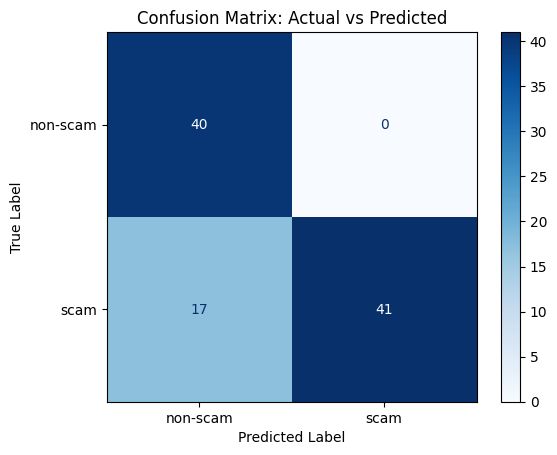

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Test_y, pred)


display_labels = ["non-scam", "scam"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap="Blues")


disp.ax_.set_title("Confusion Matrix: Actual vs Predicted")

disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")

plt.show()
